# TF data records and dataset creation  + TF Data API

## Exemplo simples
#### O que é a classe "dataset" do TF
## ver https://www.tensorflow.org/guide/data
### Criação deste tipo de dados com tf.data.Dataset.from_tensor_slices() ou só "from_tensor"

Carregar as bibs

In [192]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from time import time
import cv2
import os
import pickle

#para usar GPU
gp=tf.config.experimental.list_physical_devices('GPU')
#print(gp)
if len(gp)!=0:
    tf.config.experimental.set_memory_growth(gp[0],True)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


#### Criar gerador a partir de tensor (range)

In [132]:
a=tf.range(10)
print(a)
print(type(a))

tf.Tensor([0 1 2 3 4 5 6 7 8 9], shape=(10,), dtype=int32)
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [137]:
X=tf.range(10)
print(X)
DT=tf.data.Dataset.from_tensor_slices(X)
print(DT)
for i in DT:
    print(i)
#transf. - repetir + criar bacthes
DT=DT.repeat(3).batch(12)
print(DT)
for i in DT:
    print(i)



tf.Tensor([0 1 2 3 4 5 6 7 8 9], shape=(10,), dtype=int32)
<TensorSliceDataset shapes: (), types: tf.int32>
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
<BatchDataset shapes: (None,), types: tf.int32>
tf.Tensor([0 1 2 3 4 5 6 7 8 9 0 1], shape=(12,), dtype=int32)
tf.Tensor([2 3 4 5 6 7 8 9 0 1 2 3], shape=(12,), dtype=int32)
tf.Tensor([4 5 6 7 8 9], shape=(6,), dtype=int32)


#### O código anterior pode ser feito encadeando comandos 

In [208]:
batchS=12
DT=tf.data.Dataset.range(10).repeat(3).batch(batchS).shuffle(buffer_size=10)
for i in DT:
    print(i)

tf.Tensor([2 3 4 5 6 7 8 9 0 1 2 3], shape=(12,), dtype=int64)
tf.Tensor([0 1 2 3 4 5 6 7 8 9 0 1], shape=(12,), dtype=int64)
tf.Tensor([4 5 6 7 8 9], shape=(6,), dtype=int64)


In [205]:
#baralhar (necessário recomeçar)
DT=tf.data.Dataset.range(10).repeat(3).shuffle(buffer_size=10,seed=42).batch(batchS)
#DT=DT.shuffle(buffer_size=10,seed=42).batch(batchS)
for i in DT:
    print(i)


tf.Tensor([5 2 8 1 7 9 2 0 0 4 6 3], shape=(12,), dtype=int64)
tf.Tensor([1 0 9 3 7 6 7 8 3 4 6 8], shape=(12,), dtype=int64)
tf.Tensor([4 1 5 9 5 2], shape=(6,), dtype=int64)


#### Com .repeat() o gerador não para

In [197]:
DT=tf.data.Dataset.range(10).shuffle(buffer_size=10,seed=42).batch(batchS).repeat()

for i in DT:
    print(i)

tf.Tensor([5 9 6 4 7 1 2 8 3 0], shape=(10,), dtype=int64)
tf.Tensor([3 7 6 5 8 4 0 1 9 2], shape=(10,), dtype=int64)
tf.Tensor([2 8 9 6 0 4 1 3 5 7], shape=(10,), dtype=int64)
tf.Tensor([6 9 0 5 3 2 4 1 8 7], shape=(10,), dtype=int64)
tf.Tensor([9 5 1 8 7 4 3 0 2 6], shape=(10,), dtype=int64)
tf.Tensor([4 7 8 1 9 0 6 5 3 2], shape=(10,), dtype=int64)
tf.Tensor([2 1 6 8 3 0 7 4 5 9], shape=(10,), dtype=int64)
tf.Tensor([2 7 9 1 8 5 6 3 0 4], shape=(10,), dtype=int64)
tf.Tensor([7 9 0 6 2 3 5 1 8 4], shape=(10,), dtype=int64)
tf.Tensor([0 9 2 5 6 3 7 8 1 4], shape=(10,), dtype=int64)
tf.Tensor([1 4 0 6 9 5 3 8 2 7], shape=(10,), dtype=int64)
tf.Tensor([1 4 2 6 7 8 3 5 9 0], shape=(10,), dtype=int64)
tf.Tensor([1 0 4 8 7 6 3 9 2 5], shape=(10,), dtype=int64)
tf.Tensor([3 9 0 1 5 7 6 2 4 8], shape=(10,), dtype=int64)
tf.Tensor([2 8 3 7 9 0 6 5 4 1], shape=(10,), dtype=int64)
tf.Tensor([6 7 2 0 1 5 8 3 9 4], shape=(10,), dtype=int64)
tf.Tensor([8 6 4 1 9 2 0 3 5 7], shape=(10,), dtype=int6

KeyboardInterrupt: 

#### Aceder aos elementos de DT:
#### Notar que DT são só 3 tensores - take(n) com n>3 não altera resultado
#### Mas pode-se chamar várias vezes e dá tensores diferentes

In [203]:
for n in range(3):
    for r in DT.take(5):
        print(r)
    print('-')

tf.Tensor([2 3 4 5 6 7 8 9 0 1 2 3], shape=(12,), dtype=int64)
tf.Tensor([4 5 6 7 8 9], shape=(6,), dtype=int64)
tf.Tensor([0 1 2 3 4 5 6 7 8 9 0 1], shape=(12,), dtype=int64)
-
tf.Tensor([4 5 6 7 8 9], shape=(6,), dtype=int64)
tf.Tensor([2 3 4 5 6 7 8 9 0 1 2 3], shape=(12,), dtype=int64)
tf.Tensor([0 1 2 3 4 5 6 7 8 9 0 1], shape=(12,), dtype=int64)
-
tf.Tensor([2 3 4 5 6 7 8 9 0 1 2 3], shape=(12,), dtype=int64)
tf.Tensor([4 5 6 7 8 9], shape=(6,), dtype=int64)
tf.Tensor([0 1 2 3 4 5 6 7 8 9 0 1], shape=(12,), dtype=int64)
-


#### Criar e ler um simples dataset

### Criar um gerador 

In [158]:
#criar gerador de três elementos
def arrayInt():
    return rd.randint(-2**15,2**15,size=4,dtype='int16')

def matrixUint():
    return rd.randint(0,255,size=(3,3),dtype='uint8')

def arrayFloat():
    return rd. randn(5).astype(np.float32)

def generator():
    #deitar continuamente
    while(True):
        a=arrayInt()
        M=matrixUint()
        f=arrayFloat()
        
        yield a,M,f

In [161]:
c=0
for a,M,f in generator():
    c+=1
    print(a)
    print(M)
    print(f)
    if c>5:
        break

print(c)                      

[-9664  1814 16082 -5422]
[[174 121 225]
 [183 189   9]
 [ 69 175  16]]
[-1.0999719   0.11372941  1.5592335  -0.40443957 -0.93626505]
[31978 -6440 20259 15913]
[[177 191 165]
 [107  60 182]
 [ 97  80  73]]
[-1.219581    0.6939774  -0.5321984  -0.55153555 -0.7087945 ]
[ 14957  31681  27183 -30740]
[[208 156 161]
 [ 16 160  13]
 [103  32 102]]
[0.75400746 0.4059997  0.21547839 0.3382673  0.35364875]
[21245 -3219 -3164 25968]
[[204 154  27]
 [110  56 212]
 [ 17  47   2]]
[-0.77188593 -0.5023383  -0.02088019  0.3830908   1.7038862 ]
[ 13650  -9724   8775 -15946]
[[124 216 235]
 [161 142  62]
 [129  32 179]]
[ 0.46829972  1.9050341  -0.7707365  -0.31116116 -0.04753039]
[-19367  30382  25698  28629]
[[150  40  19]
 [ 12 168 254]
 [243 135  69]]
[-0.5030424   0.3905247  -0.32169467  0.3690189   0.42744833]
6


#### TF Generator

In [162]:
DT=tf.data.Dataset.from_generator(generator,(tf.int16,tf.uint8,tf.float32),((4,),(3,3),(5,)))
DT2=DT.batch(1)
for a,M,f in DT.take(4):
    print(a)
    print(M)
    print(f)

tf.Tensor([-27762   4119 -21466   9569], shape=(4,), dtype=int16)
tf.Tensor(
[[181 114 159]
 [ 87 103 125]
 [ 98  80 147]], shape=(3, 3), dtype=uint8)
tf.Tensor([-0.13291968  0.67417353  0.2437165  -1.2371067  -1.1164429 ], shape=(5,), dtype=float32)
tf.Tensor([-15943 -12276  -9545  -9070], shape=(4,), dtype=int16)
tf.Tensor(
[[220 248 192]
 [106  62 251]
 [164  23 186]], shape=(3, 3), dtype=uint8)
tf.Tensor([ 0.02280253  0.8596388   1.1581112   0.5963715  -0.1857946 ], shape=(5,), dtype=float32)
tf.Tensor([25169  -502 14755 -9987], shape=(4,), dtype=int16)
tf.Tensor(
[[ 98   8   5]
 [105 132 102]
 [196 151  56]], shape=(3, 3), dtype=uint8)
tf.Tensor([ 1.1551803  -0.65935916 -1.921149   -0.6476706  -0.03043949], shape=(5,), dtype=float32)
tf.Tensor([ 11082 -20151 -25111 -20970], shape=(4,), dtype=int16)
tf.Tensor(
[[ 25 190 173]
 [175  75 124]
 [ 47  27 223]], shape=(3, 3), dtype=uint8)
tf.Tensor([ 1.0355753   0.09367475  0.26215106 -0.24967682 -0.01290622], shape=(5,), dtype=float32)


## TF Generators from files
#### Atenção: é boa política primeiro baralhar a lista com nomes dos ficheiros
### Dataset: Oxford-IIIT-Pet
### Ficheiros que podem dar problemas:
##### Egyptian_Mau_129.jpg, staffordshire_bull_terrier_2.jpg, staffordshire_bull_terrier_22.jpg
##### Abyssinian_34.jpg, Egyptian_Mau_139.jpg, Egyptian_Mau_145.jpg, Egyptian_Mau_167.jpg, Egyptian_Mau_177.jpg, Egyptian_Mau_191.jpg


In [82]:
dicF='/home/gcm/gcm/aulas/AAA/Data/Oxford-IIIT-Pet/Oxford-IIIT-Pet_Dics.p'
imgP='/home/gcm/gcm/aulas/AAA/Data/Oxford-IIIT-Pet/images/'

DicTmp=pickle.load(open(dicF,'rb'))
imgDic=DicTmp['filesDic']
imgK=list(imgDic.keys())
idx=rd.permutation(len(imgK))
imgK=[imgK[i] for i in idx]
print('Número total de imagens:',len(imgK))


Número total de imagens: 7390


In [71]:
imgK[:10]

['english_setter_153.jpg',
 'Bombay_175.jpg',
 'pomeranian_12.jpg',
 'Sphynx_40.jpg',
 'Siamese_240.jpg',
 'beagle_150.jpg',
 'japanese_chin_168.jpg',
 'Russian_Blue_215.jpg',
 'Siamese_79.jpg',
 'american_bulldog_123.jpg']

#### Criar gerador

In [72]:
imgGen=tf.data.Dataset.from_tensor_slices(imgK)

for n,f in enumerate(imgGen.take(10)):
    print(n,':',f)

0 : tf.Tensor(b'english_setter_153.jpg', shape=(), dtype=string)
1 : tf.Tensor(b'Bombay_175.jpg', shape=(), dtype=string)
2 : tf.Tensor(b'pomeranian_12.jpg', shape=(), dtype=string)
3 : tf.Tensor(b'Sphynx_40.jpg', shape=(), dtype=string)
4 : tf.Tensor(b'Siamese_240.jpg', shape=(), dtype=string)
5 : tf.Tensor(b'beagle_150.jpg', shape=(), dtype=string)
6 : tf.Tensor(b'japanese_chin_168.jpg', shape=(), dtype=string)
7 : tf.Tensor(b'Russian_Blue_215.jpg', shape=(), dtype=string)
8 : tf.Tensor(b'Siamese_79.jpg', shape=(), dtype=string)
9 : tf.Tensor(b'american_bulldog_123.jpg', shape=(), dtype=string)


In [73]:
print(type(f))
print(f)


<class 'tensorflow.python.framework.ops.EagerTensor'>
tf.Tensor(b'american_bulldog_123.jpg', shape=(), dtype=string)


In [74]:
b=f.numpy().decode()
print(b)

american_bulldog_123.jpg


In [174]:
imgDic['Abyssinian_34.jpg']

{'species': 'cat',
 'breed': 'Abyssinian',
 'target': 25,
 'imgDim': (202, 250, 4),
 'foldTrain': False,
 'bndBox': []}

#### Transformações


### 1. Assim dá erro (tensor r ainda não inicializado - não tem a função .numpy())

In [4]:
@tf.function
def readImg(r):
    print(r)
    f=r.numpy().decode()
    #I=cv2.imread(imgP+f)
    #I=cv2.cvtColor(I,cv2.COLOR_BGR2RGB)
    I=plt.imread(imgP+f)
    #y=imgDic[f]['target']
    
    return I
ImG=imgGen.map(readImg)

Tensor("r:0", shape=(), dtype=string)


AttributeError: in user code:

    <ipython-input-4-464daa25eabd>:4 readImg  *
        f=r.numpy().decode()
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/ops.py:401 __getattr__
        self.__getattribute__(name)

    AttributeError: 'Tensor' object has no attribute 'numpy'


### 2. Assim já funciona 
### Não se pode ainda fazer .batch porque as imagem têm tamanhos diferentes.
### Para tal tem que se converter as imagens em tamanhos iguais.

In [297]:
def readImg(r):
    print(r)
    f=r.numpy().decode()
    #I=cv2.imread(imgP+f)
    #I=cv2.cvtColor(I,cv2.COLOR_BGR2RGB)
    I=plt.imread(imgP+f).astype('float32')
    return I

@tf.function
def imgWrapper(r):
    I=tf.py_function(readImg,[r], [tf.float32])
    return I

imgGen=tf.data.Dataset.from_tensor_slices(imgK)

imgGen=imgGen.shuffle(buffer_size=2).shuffle(buffer_size=500)
ImG=imgGen.map(imgWrapper)

tf.Tensor(b'havanese_164.jpg', shape=(), dtype=string)


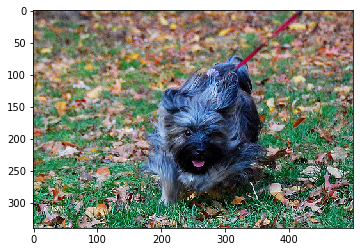

In [302]:
for I in ImG.take(1):
    plt.imshow(I[0].numpy().astype('uint8'))

### Gerador que converte imagens em tamanhos iguais.
### Incluir também a classe 
### Já se pode fazer batch DEPOIS da conversão

In [98]:
yClasses=np.array([imgDic[f]['target'] for f in imgK],dtype='int16')

In [233]:
def cropImg(I):
    #ver dims.
    #se for só 1 canal -> copiar 3x
    if len(I.shape)==2:
        I=np.stack((I,I,I),axis=2)
    #se tiver 4 canais, tirar último
    if I.shape[2]==4:
        I=I[:,:,:3]
    #fazer crop: maior quadrado central
    h=I.shape[0]
    w=I.shape[1]
    L=np.min((h,w))
    x1=(w-L)//2
    y1=(h-L)//2
    I=I[y1:y1+L,x1:x1+L,:]
    return I

def readImg(r):
    f=r.numpy().decode()
    print(f)
    I=plt.imread(imgP+f).astype('float32')
    I=cropImg(I)
    I=cv2.resize(I,(300,300),interpolation=cv2.INTER_LINEAR)
    return I

@tf.function
def imgWrapper(r,y):
    I=tf.py_function(readImg,[r], [tf.float32])[0] #neceesário! se não o tensor fica de (bSize,1,300,300,3)
    return I,y

bSize=10
imgGen=tf.data.Dataset.from_tensor_slices((imgK,yClasses))
imgGen=imgGen.shuffle(buffer_size=2).shuffle(buffer_size=1000)
ImG=imgGen.map(imgWrapper).batch(bSize)

(250, 350, 4)
(250, 250, 3)


'Abyssinian_34.jpg'

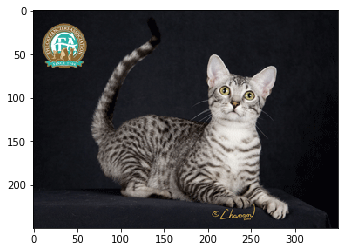

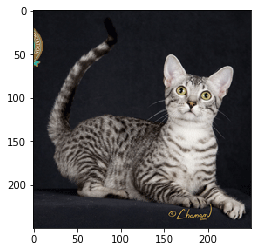

In [234]:
#I=plt.imread(imgP+'Egyptian_Mau_129.jpg')
I=plt.imread(imgP+'Egyptian_Mau_139.jpg')
#I=plt.imread(imgP+'Egyptian_Mau_145.jpg')
print(I.shape)
plt.imshow(I)
B=cropImg(I)
print(B.shape)
plt.figure()
plt.imshow(B)
'Abyssinian_34.jpg'

shiba_inu_192.jpg
Abyssinian_114.jpg
english_cocker_spaniel_15.jpg
german_shorthaired_186.jpg
newfoundland_117.jpg
saint_bernard_13.jpg
pomeranian_85.jpg
american_pit_bull_terrier_204.jpg
Russian_Blue_86.jpg
pug_105.jpg
Siamese_206.jpgtf.Tensor([21 25  6  8 15 18 16  1 34 17], shape=(10,), dtype=int16)
 (10, 300, 300, 3)


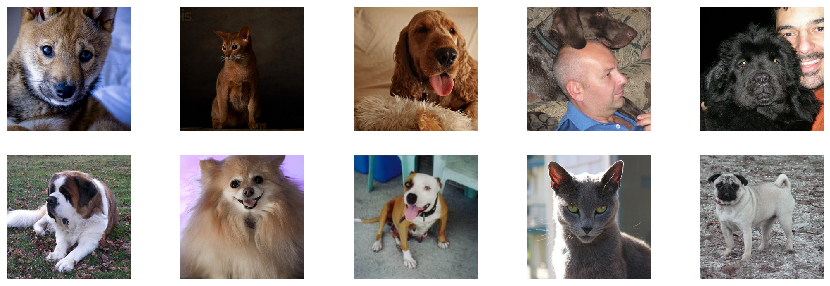

In [296]:
for I,y in ImG.take(1):
    print(y,I.shape)
plt.figure(figsize=(15,5))
for i in range(bSize):
    plt.subplot(2,5,i+1)
    A=I[i].numpy()
    #A.clip(0,255)
    plt.imshow(A.astype('uint8'))
    plt.axis('off')

# Tensorflow Datasets - guardados em formato "TFrecords"

In [67]:
import tensorflow_datasets as tfds

dt,info=tfds.load(name="oxford_iiit_pet",as_supervised=True,with_info=True)
print(info)
class_names=info.features["label"].names #or num_classes

tfds.core.DatasetInfo(
    name='oxford_iiit_pet',
    full_name='oxford_iiit_pet/3.2.0',
    description="""
    The Oxford-IIIT pet dataset is a 37 category pet image dataset with roughly 200
    images for each class. The images have large variations in scale, pose and
    lighting. All images have an associated ground truth annotation of breed.
    """,
    homepage='http://www.robots.ox.ac.uk/~vgg/data/pets/',
    data_path='/home/gcm/tensorflow_datasets/oxford_iiit_pet/3.2.0',
    download_size=773.52 MiB,
    dataset_size=774.69 MiB,
    features=FeaturesDict({
        'file_name': Text(shape=(), dtype=tf.string),
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=37),
        'segmentation_mask': Image(shape=(None, None, 1), dtype=tf.uint8),
        'species': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={


(375, 500, 3) 32
(500, 333, 3) 22
(500, 500, 3) 33
(191, 300, 3) 36
(333, 500, 3) 28


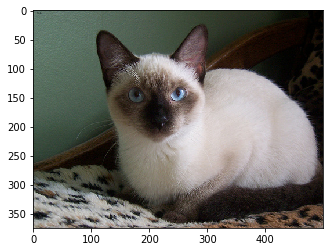

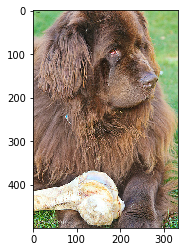

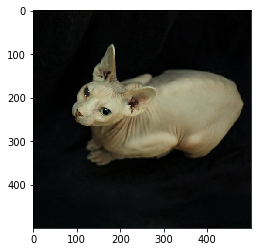

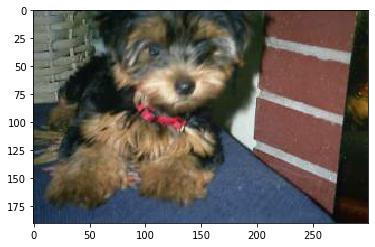

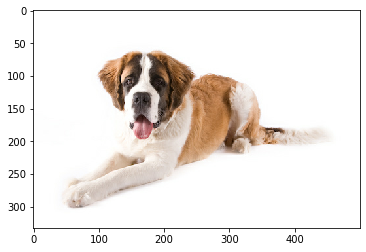

In [287]:
trainG=dt['train']
#trainG.batch(2) -> não dá porque as imagens são de tamanhos diferentes
trainG=trainG.shuffle(buffer_size=10)
for I,y in trainG.take(5):
    print(I.shape,y.numpy())
    plt.figure()
    plt.imshow(I)

## Usar só comandos do TF (s,L,x1 e y1 são tensores!!!)
## Assim não é necessário usar o decorador "@tf.function"

In [288]:
def central_crop(image,y):
    s = tf.shape(image)
    L=tf.reduce_min((s[0],s[1]))
    x1=(s[1]-L)//2
    y1=(s[0]-L)//2
    image=tf.image.resize(image[y1:y1+L, x1:x1+L], [300, 300])
    return image,y


(300, 300, 3) 17
(300, 300, 3) 36
(300, 300, 3) 23
(300, 300, 3) 8
(300, 300, 3) 7


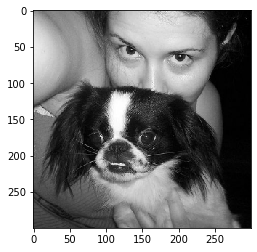

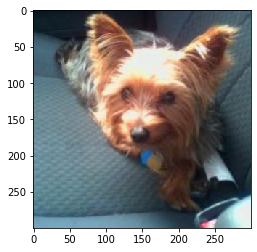

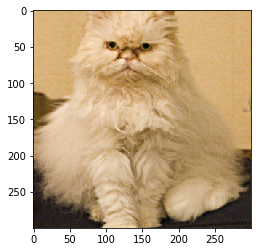

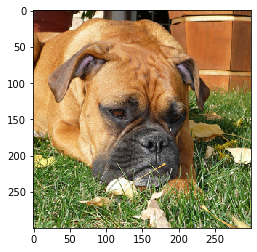

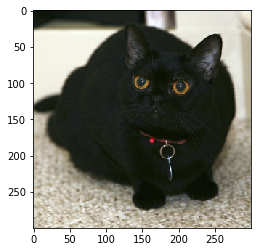

In [291]:
trainG=dt['train']
trainG=trainG.shuffle(buffer_size=100)
trainG=trainG.map(central_crop)
for I,y in trainG.take(5):
    print(I.shape,y.numpy())
    plt.figure()
    A=I.numpy()
    plt.imshow(A.astype('uint8'))

### Também se pode usar .batch (DEPOIS de transformar!)

(5, 300, 300, 3) [ 5 32 12  1  6]
(5, 300, 300, 3) [14 17  2 11 12]
(5, 300, 300, 3) [ 5 33 25 20 16]
(5, 300, 300, 3) [ 2 31 13  9  5]
(5, 300, 300, 3) [10 17  7 25 25]


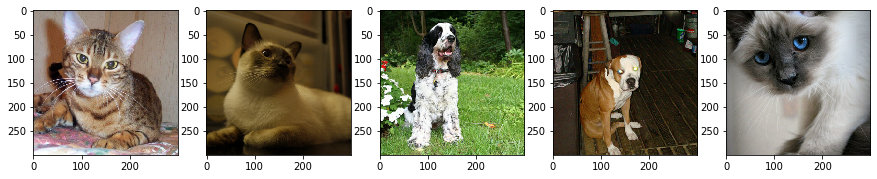

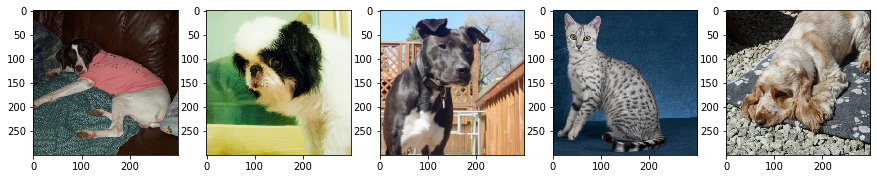

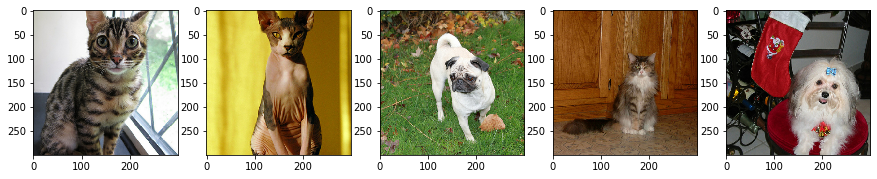

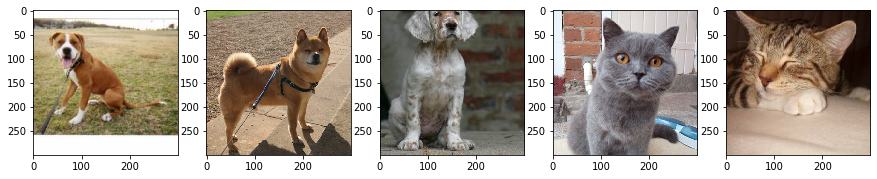

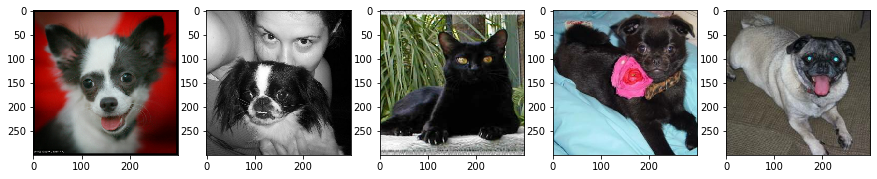

In [295]:
trainG=dt['train']
trainG=trainG.shuffle(buffer_size=100)
trainG=trainG.map(central_crop).batch(5)
for I,y in trainG.take(5):
    print(I.shape,y.numpy())
    plt.figure(figsize=(15,3))
    for i in range(5):
        plt.subplot(1,5,i+1)
        A=I[i].numpy()
        plt.imshow(A.astype('uint8'))